## Modeling Insights notebook
This is the Modeling insights notebook for the Solar Forecasting Intensity project
By: <br>
Andres Aguilar  <br>
Martijn de Vries<br>
William Lopez<br>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Baseline Model

To evaluate the success of our models, we establish the baseline model here, which we define as the GHI produced on an average day in the 5 year dataset

First, we load in the data

In [6]:
df = pd.read_csv('../data/NSRDB_to_model.csv')
df.head()

,datetime,Wind_x,Wind_y,Dew Point,Cloud Type,Day Seasonality,Year Seasonality,Pressure,Relative Humidity,Temperature,Solar Zenith Angle,GHI
0,2016-01-01 00:00:00,-0.635439,-0.735724,-5.0,0,-1.407890e-12,-0.002666,990,49.00,5.0,168.95,0
1,2016-01-01 00:30:00,-0.635439,-0.735724,-5.0,0,1.305262e-01,-0.002308,990,49.00,5.0,166.74,0
2,2016-01-01 01:00:00,-0.558814,-0.795487,-5.0,0,2.588190e-01,-0.001950,990,48.97,5.0,162.23,0
3,2016-01-01 01:30:00,-0.558814,-0.795487,-5.0,0,3.826834e-01,-0.001591,990,48.97,5.0,156.74,0
4,2016-01-01 02:00:00,-0.479173,-0.851865,-5.0,0,5.000000e-01,-0.001233,990,48.98,5.0,150.83,0


Now we need to calculate the GHI curve of an average day. We can do this by folding the series every 48 timesteps (=1 day)

In [26]:
def calc_average_GHIcurve(ghi, ts=48):
    """
    Given a series of GHI values and the number of observations in a single day
    calculate the average daily GHI curve 
    Returns:
        average curve, with the same length as the input dataset
    """
    glen = len(ghi)
    ndays = glen//ts
    ghi_arr = np.zeros((ts, ndays))
    for i in range(ndays):
        ghi_arr[:,i] = ghi[i*ts:(i+1)*ts]
    return np.array(list(np.mean(ghi_arr, axis=1))* ndays)

In [27]:
avg_ghi = calc_average_GHIcurve(df['GHI'])

Let's plot the average curve

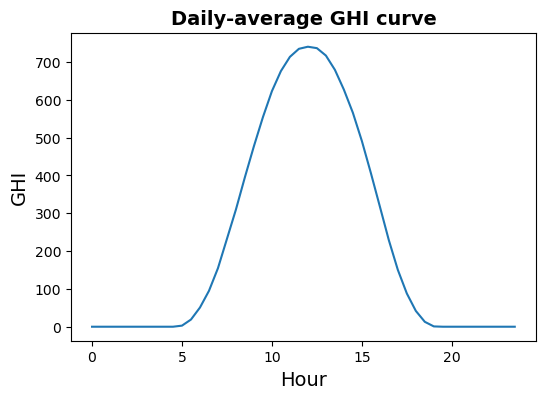

In [36]:
time = np.arange(0, 24, 0.5)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time, avg_ghi[:48])
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('GHI', fontsize=14)
ax.set_title('Daily-average GHI curve', fontsize=14, fontweight='bold');

Now we can establish the root mean squared error and mean absolute error for the baseline model.

First, we'll need to again filter out points where the solar zenith angle is above 90 degrees

In [41]:
idx = np.where(df['Solar Zenith Angle'] < 90)
ghi_filt = df['GHI'].iloc[idx]
avg_ghi_filt = avg_ghi[idx]

In [42]:
rmse_base = mean_squared_error(ghi_filt, avg_ghi_filt, squared=False)
mae_base = mean_absolute_error(ghi_filt, avg_ghi_filt)

print(f'The Root mean squared error for the baseline model is {round(rmse_base,2)} GHI')
print(f'The mean absolute error for the baseline model is {round(mae_base,2)} GHI')

The Root mean squared error for the baseline model is 198.4 GHI
The mean absolute error for the baseline model is 160.68 GHI
